In [2]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

%matplotlib inline

# 2020-01-15 Probabilitas dan Statistika II

Source: [Soal Latihan Probabilitas dan Statistika](https://docs.google.com/document/d/19eJuNJJvCIl_ssjAaNLyeflKTqytlTC5frsUzpVL41Q/edit#heading=h.lsjr3acufp6l)

## Mudah

### 1. Sebuah program memiliki kemungkinan menyebabkan komputer crash sebesar 0.2. Program tersebut dijalankan di 50 komputer. Berapa peluangnya semua komputer dapat bekerja dengan baik?

In [9]:
p_crash = 0.2
n = 50

p_not_crash = 1 - p_crash
p_all_not_crash = np.power(p_not_crash, n)

print(p_all_not_crash)

1.4272476927059638e-05


In [19]:
from scipy.stats import binom

binom(n=50, p=.2).cdf(0)

1.4272476927059638e-05

In [20]:
binom(n=50, p=.2).pmf(0)

1.4272476927059582e-05

### 2. Sebuah cuitan di Twitter ditunjukkan ke 100 orang berbeda. Asumsikan bahwa peluang cuitan tersebut akan di-RT oleh sembarang orang adalah 0.7. Berapa ekspektasi jumlah RT yang didapat?

In [11]:
p_retweet = 0.7
n = 100
expected_value = n*p_retweet

print(expected_value)

70.0


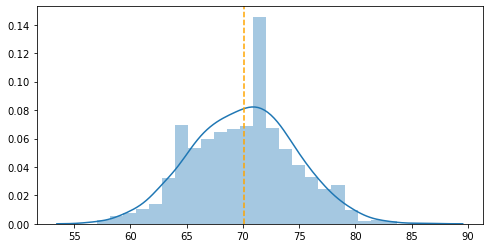

In [104]:
## answer using simulation: Monte Carlo method

n_trials = 1000
p_retweet = 0.7
x = []

for i in range(n_trials):
    x.append(
        (np.random.rand(100) <= p_retweet).sum()
    )

f, ax = plt.subplots(figsize=(8,4))
sns.distplot(x)
plt.axvline(
    x=np.mean(x),
    linestyle='--',
    color='orange'
)

plt.show();

### 3. Dalam setahun, rata-rata ada 2.8 gempa bumi berskala besar yang terjadi di dunia. Berapa peluangnya ada > 1 gempa bumi berskala besar di tahun depan? (Sumber: Stanford CS109)

In [107]:
from scipy.stats import poisson

mu = 2.8

1 - poisson.cdf(k=1, mu=mu).sum()

0.7689217620241717

In [108]:
1 - poisson(mu).cdf(1)

0.7689217620241717

In [140]:
## if we approximate it using normal distribution
## mu = lambda, sigma squared = lambda
from scipy.stats import norm

p_0 = norm(mu, np.sqrt(mu)).cdf(0)
p_1 = norm(mu, np.sqrt(mu)).cdf(1)

1 - (p_0 + p_1)

0.8118384086986155

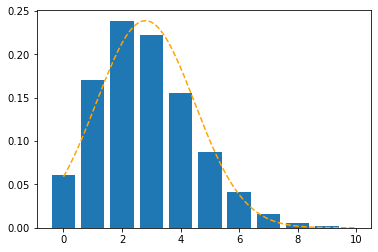

In [141]:
k = np.arange(10)
x = np.linspace(0,10,1000)

plt.bar(k, poisson(mu).pmf(k))
plt.plot(
    x,
    norm(mu, np.sqrt(mu)).pdf(x),
    linestyle='--',
    color='orange'
);

### 4. Seorang pengemudi ojek online mendapatkan rata-rata 90 penumpang per minggu di suatu kota. Berapa peluangnya di minggu ini dia akan mendapatkan minimal 80 penumpang?

In [185]:
mu = 90

1 - poisson.cdf(k=79, mu=mu)

0.8668195027664695

In [188]:
## have similar result using normal distribution assumption
1 - norm(mu, np.sqrt(mu)).cdf(79)

0.8768741501537365

### 5. Suatu konferensi machine learning top dunia punya rata-rata acceptance rate 25%. Jika di tahun ini mereka mendapatkan 2400 paper untuk diulas, berapa peluangnya jumlah paper yang diterima di tahun ini tidak sampai 500?

In [191]:
p_accept = 0.25
n = 2400

n*p_accept

600.0

P(x < 500) = 6.821028653817123e-07


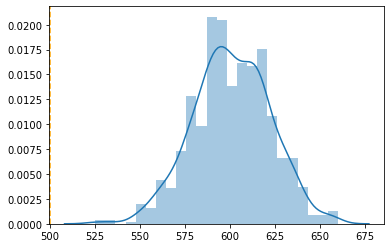

In [193]:
x = []
for i in range(1000):
    x.append(
        binom(n, p_accept).rvs()
    )
    
sns.distplot(x);

p_lt_500 = binom(n, p_accept).cdf(499)

plt.axvline(
    x=500,
    linestyle='--',
    color='orange'
);

print("P(x < 500) = {}".format(p_lt_500))

In [196]:
binom(n, p_accept).logcdf(499)

-14.198085361471056

### 6. Rata-rata occupancy dari sebuah hotel di kota X pada hari Sabtu adalah 85%. Jika hotel tersebut memiliki 20 kamar, berapa peluangnya hotel tersebut akan terisi penuh di hari Sabtu yang akan datang?

In [201]:
p_occupancy = 0.85
n = 20

binom(n, p_occupancy).pmf(20)

0.03875953108451434

In [207]:
## approximate using Poisson, but the result differs by ~3%
poisson(n*p_occupancy).pmf(20)

0.06915882695522822

### 7. Ketika melempar koin, mana yang lebih mungkin: 51 atau lebih muncul “angka” dari 100 lemparan atau 510 atau lebih muncul “angka” dari 1000 lemparan?

Newton-Pepys problem

In [212]:
n = 100
p = 0.5 ## fair coin assumption

1 - binom(n, p).cdf(50)

0.4602053813064103

In [213]:
n = 1000
p = 0.5

1 - binom(n, p).cdf(509)

0.2739863729620471

## Sedang

### 1. Di suatu pusat data dengan 100 server, tiap request dialokasikan ke tiap server secara acak dengan peluang yang sama. Berdasarkan catatan, setiap server akan mendapatkan rata-rata 2 requests per detik. Perusahaan yang menggunakan pusat data tersebut baru saja merilis kode ke semua server yang menyebabkan server akan crash jika mendapatkan lebih dari 6 requests per detik. Berapa peluangnya bahwa tidak ada server yang akan crash di detik berikutnya? (Sumber: Stanford CS109)

In [241]:
from scipy.stats import poisson

n_server = 100
p_server_assigned = 1/100 ## this is not used
rate = 2

p_not_crash = poisson(rate).cdf(6)

In [244]:
print("P(not crash in one server) = {}".format(p_not_crash))

P(not crash in one server) = 0.9954661944737512


In [248]:
p_not_crash_in_all_server = np.power(p_not_crash, n_server)

print("P(not crash in all server) = {}".format(p_not_crash_in_all_server))

P(not crash in all server) = 0.634821488981177


## Sukar

### 4. Seorang penikmat musik sedang shuffle play lagu soundtrack Charlie's Angels terbaru. Di albumnya ada 11 lagu, 6 di antaranya lagu Ariana Grande. Berapa peluangnya didapatkan lagu Ariana Grande tiga kali berturut-turut? (Sumber: Twitter)

Assumptions: sampling without replacement

In [279]:
songs = [c for c in 'aaaaaaxxxxx']

n_trials = 1000
success = 0

for _ in range(n_trials):
    np.random.shuffle(songs)
    if ''.join(songs).find('aaa') != -1:
        success += 1
        
print(success / n_trials)

0.691


In [280]:
# from itertools import permutations 
  
# perm = permutations([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 3) 
# x = 0
# ariana_perm = []
# all_perm = []

# # Print the obtained permutations 
# for i in list(perm): 
#     if ((i[1] - i[0]) == 1) and (i[2] - i[1] == 1):
#         x += 1
#         ariana_perm.append(i)
#     all_perm.append(i)
    
# print(x)